In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

def generate_time_series(batch_size, n_steps):
    #(4,batch_size,1)矩阵，数值为符合高斯分布的随机数[0,1)
    #四个变量(batch_size，1)向量
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps) #时间变量，(1，n_steps)向量
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise ，范围[-0.05,0.05)
    return series[..., np.newaxis].astype(np.float32)

#返回（batch_size，n_step） 矩阵

In [2]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

#前50个序列为数据集，51序列预测值为标签
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1] 

In [26]:
#建立基线指标
#使用朴素预测，预测每个序列的最后一个值，得到方差0.02

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.02084503

In [42]:
#使用全连接网络做基线
#使预测值是时间序列中每个值的线性组合
#MSE 损失函数、Adam 优化器编译模型
#在训练集上训练 20 个周期，用验证集评估，最终得到的 MSE 值为 0.004。比朴素预测强
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
]) 

In [43]:
#在训练集上训练 20 个周期，用验证集评估，最终得到的 MSE 值为 0.0038。明显好于朴素预测

optimizer = keras.optimizers.Adam()
model.compile(loss="MSE",
              optimizer=optimizer,
              metrics=["accuracy"])

history=  model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.0000e+00 - val_loss: 0.0387 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.0000e

[0.003828289918601513, 0.0]

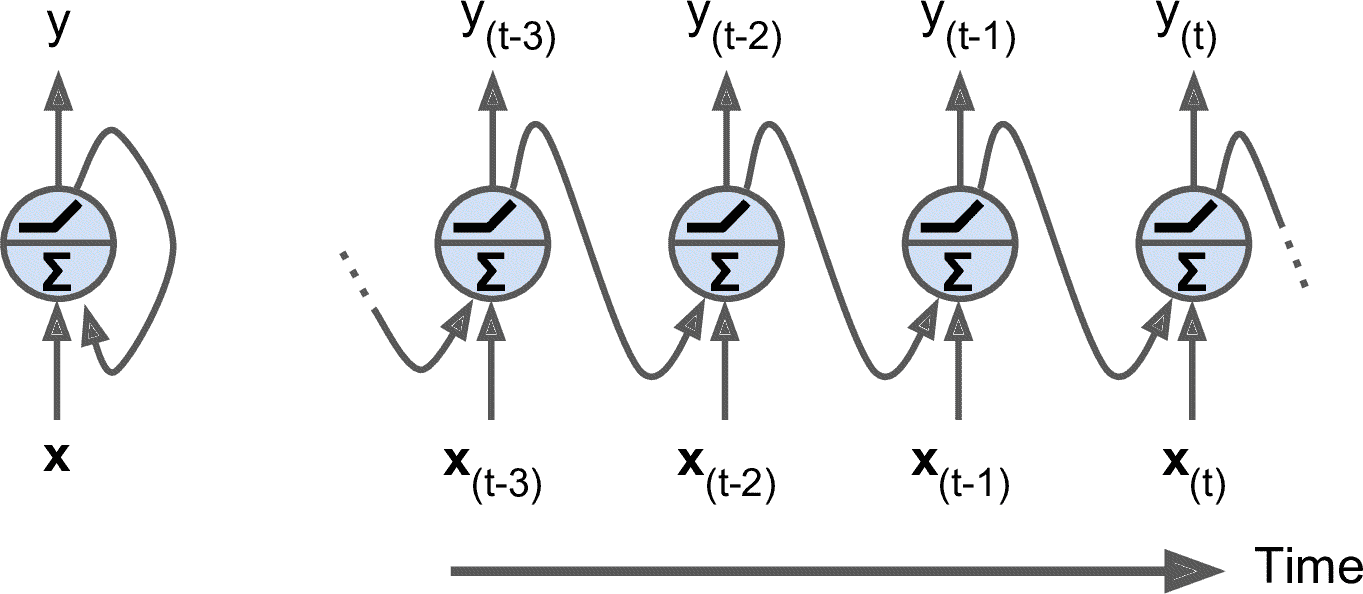

In [40]:
#搭建一个简单 RNN 模型
#不用指定输入序列的长度，因为循环神经网络可以处理任意的时间步。
#默认使用 tanh 激活函数，预测值位于 -1 和 1 之间
#默认时，Keras 的循环层只返回最后一个输出。

model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
]) 

from IPython.display import Image 
Image(filename="./images/simplernn.png",width=640)

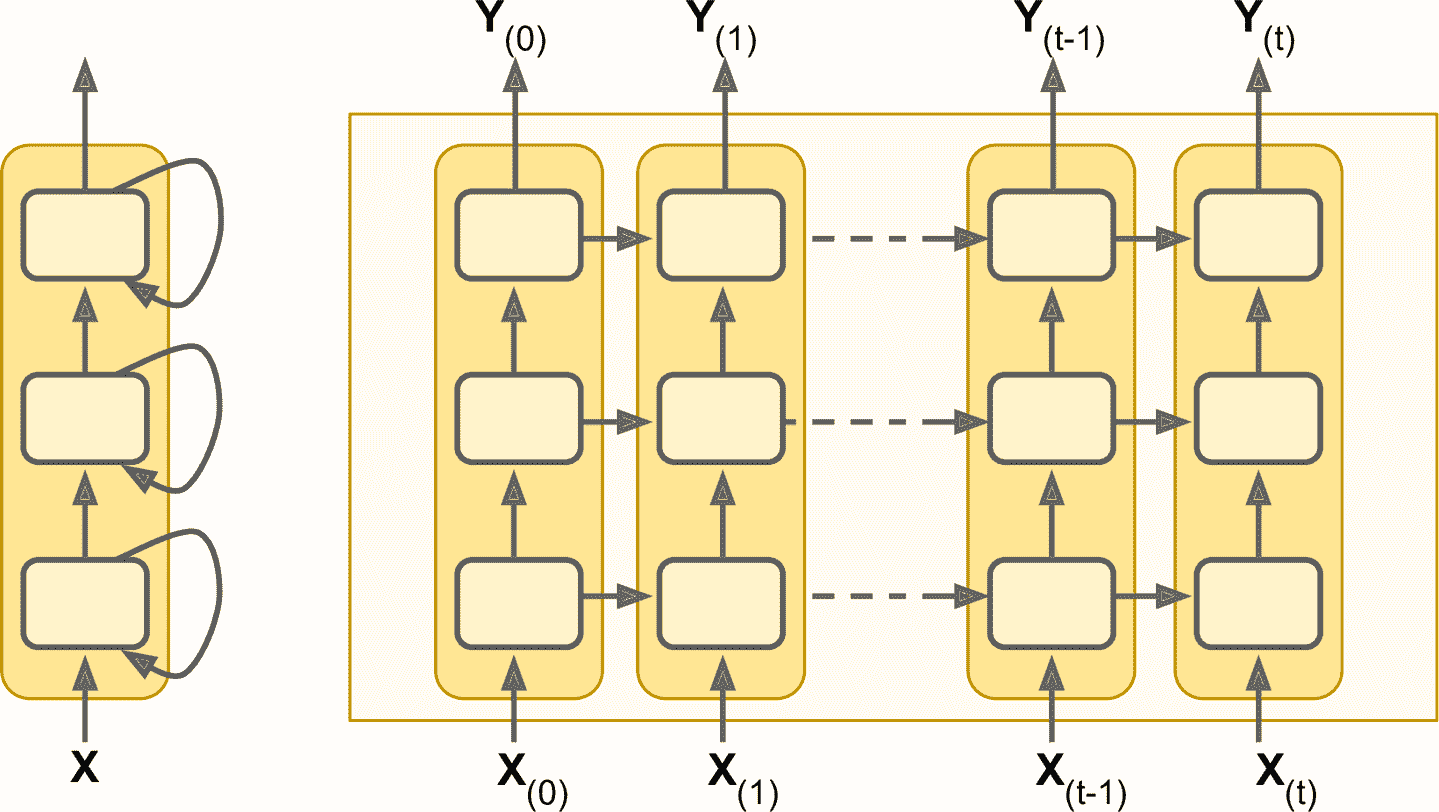

In [44]:
#深度RNN
#所有循环层一定要设置return_sequences=True（除了最后一层）
#如果没有设置，输出的是 2D 数组（只有最终时间步的输出），而不是 3D 数组（包含所有时间步的输出）
#下一个循环层就接收不到 3D 格式的序列数据

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
]) 

Image(filename="./images/deeprnn.png",width=640)

In [45]:
#模型经过一样的训练过程，最终得到的 MSE 值为 0.0023，优于全连接

optimizer = keras.optimizers.Adam()
model.compile(loss="MSE",
              optimizer=optimizer,
              metrics=["accuracy"])

history=  model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))


Epoch 1/20
219/219 [==============================] - 6s 13ms/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0031 - accuracy: 

[0.0023680920712649822, 0.0]

In [46]:
model.evaluate(X_valid, y_valid,verbose=2)
#性能266ms/epoch - 4ms/step

63/63 - 0s - loss: 0.0024 - accuracy: 0.0000e+00 - 266ms/epoch - 4ms/step


[0.0023680920712649822, 0.0]

In [3]:
#使用另一个激活函数，最后一层使用紧密层，运行更快，准确率差不多，可以选择任何激活函数。
#如果做了替换，要将第二个循环层的return_sequences=True删掉：

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam()
model.compile(loss="MSE",
              optimizer=optimizer,
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 11ms/step - loss: 0.0223 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0029 - accuracy: 

In [4]:
model.evaluate(X_valid, y_valid,verbose=2)
#方差0.0026，稍差于之前一种模型
#但性能更好 193ms/epoch - 3ms/step，优于之前 266ms/epoch - 4ms/step

63/63 - 0s - loss: 0.0026 - accuracy: 0.0000e+00 - 190ms/epoch - 3ms/step


[0.002574461977928877, 0.0]

In [2]:
#预测多个值，一次性预测出 10 个值
#修改数据集结构和模型
n_steps = 50

series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:,0] 
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:,0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:,0]
#训练集shape(batch_size,50),验证集为10个数值的向量


In [3]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
]) 

optimizer = keras.optimizers.Adam()
model.compile(loss="MSE",
              optimizer=optimizer,
              metrics=["accuracy"])

history=model.fit(X_train, Y_train, epochs=15,validation_data=(X_valid, Y_valid))

Epoch 1/15
219/219 [==============================] - 4s 10ms/step - loss: 0.0640 - accuracy: 0.3817 - val_loss: 0.0287 - val_accuracy: 0.5225
Epoch 2/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0235 - accuracy: 0.5211 - val_loss: 0.0190 - val_accuracy: 0.5530
Epoch 3/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0171 - accuracy: 0.5571 - val_loss: 0.0148 - val_accuracy: 0.5720
Epoch 4/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0139 - accuracy: 0.5771 - val_loss: 0.0131 - val_accuracy: 0.6080
Epoch 5/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0125 - accuracy: 0.5941 - val_loss: 0.0119 - val_accuracy: 0.5910
Epoch 6/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0113 - accuracy: 0.6127 - val_loss: 0.0110 - val_accuracy: 0.6345
Epoch 7/15
219/219 [==============================] - 2s 9ms/step - loss: 0.0110 - accuracy: 0.6231 - val_loss: 0.0107 - val_accuracy: 0.6375
Epoch

In [25]:
model.evaluate(X_test, Y_test, verbose=2)
#预测十个值的方差为0.008

32/32 - 0s - loss: 0.0098 - accuracy: 0.6800 - 103ms/epoch - 3ms/step


[0.009785224683582783, 0.6800000071525574]

32/32 [==============================] - 0s 3ms/step


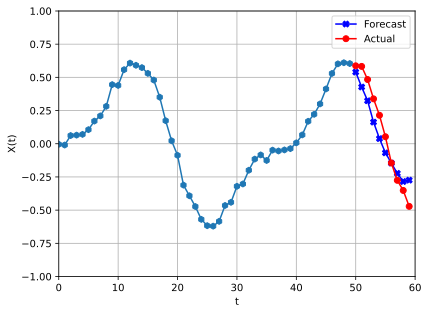

In [27]:
#随机挑一个序列，展示预测和实际的时序图

random_num=np.random.randint(0, 999)
Y_pred=model.predict(X_test)

fig, ax = plt.subplots()
ax.grid(True )

plt.plot(X_test[random_num],"-h")
plt.plot(np.arange(n_steps,n_steps+10,1),Y_pred[random_num],"b-X",label='Forecast')
plt.plot(np.arange(n_steps,n_steps+10,1),Y_test[random_num],"r-o",label='Actual')
plt.xlim((0,60))
plt.ylim((-1, 1))
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()

plt.show()


In [35]:
#将这个序列到向量的 RNN 变成序列到序列的 RNN
#在时间步 0，模型输出一个包含时间步 1-10 的预测向量，在时间步 1，输出一个时间步 2-11 的预测向量，以此类推
#每个目标必须是一个序列，其长度和输入序列长度相同，每个时间步包含一个 10D向量。

